# Basic statistics on bundeslaender

Level of the Bundesländer / states

# New Section

In [2]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 15 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [4]:
import numpy as np
import pandas as pd
import warnings
import os
import geopandas as gpd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['figure.figsize'] = [12,6]

In [17]:
acci = pd.read_csv('bundeslaender.csv')
# acci = pd.read_csv(os.path.join("../data","bundeslaender.csv"),sep=',')
acci.info

<bound method DataFrame.info of     Unnamed: 0  ULAND  IstFuss  IstRad  ...     PKW  Krad_rel   PKW_rel  fahrfreude
0            0      1      847    3895  ...   25329  2.892449  0.342532    0.010207
1            1      2      926    2310  ...    9483  3.830189  0.596119    0.006135
2            2      3     1841    7783  ...   68706  2.457532  0.325794    0.010060
3            3      4      339    1174  ...    3675  3.754098  0.630748    0.006387
4            4      5     7084   16740  ...  137212  3.104923  0.338294    0.008939
5            5      6     1741    3501  ...   52592  2.668020  0.309496    0.009600
6            6      7     1181    2239  ...   35396  3.309917  0.304921    0.010082
7            7      8     2768    8188  ...   90046  2.649272  0.291440    0.009399
8            8      9     3352   13698  ...  106751  2.612088  0.338123    0.009709
9            9     10      353     437  ...    9508  2.575419  0.302167    0.010914
10          10     11     1968    5005  ... 

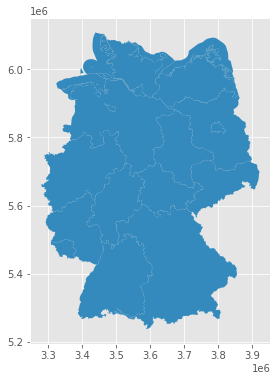

In [18]:
map_df = gpd.read_file('VG250_LAN.shp',encoding='utf8') # returns a geo data frame
map_df.plot() #


In [19]:
map_df.columns

Index(['ADE', 'GF', 'BSG', 'ARS', 'AGS', 'SDV_ARS', 'GEN', 'BEZ', 'IBZ', 'BEM',
       'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1', 'SN_V2', 'SN_G', 'FK_S3',
       'NUTS', 'ARS_0', 'AGS_0', 'WSK', 'DEBKG_ID', 'RS', 'SDV_RS', 'RS_0',
       'geometry'],
      dtype='object')

In [20]:
set(map_df['GEN']) # we get 16 Bundeslaender and 2 supplements ... strange

{'Baden-Württemberg',
 'Baden-Württemberg (Bodensee)',
 'Bayern',
 'Bayern (Bodensee)',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen'}

In [21]:
map_df=map_df.merge(acci, left_on='GEN' , right_on='Bundesland')
set(map_df['GEN']) # we are left with 16 bundesländer
# map_df.info

{'Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen'}

In [39]:
map_df.columns
type(map_df)

geopandas.geodataframe.GeoDataFrame

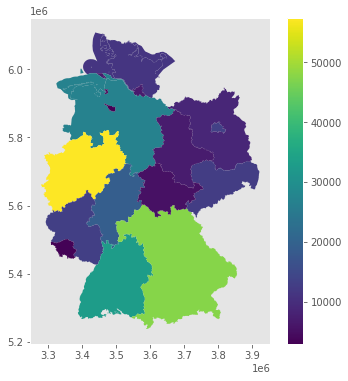

In [53]:
matplotlib.rcParams['figure.figsize'] = [6,6]

map_df.plot('accidents', legend=True).grid(axis='both')
#map_df.plot('Einwohner31122019', legend=True)

plt.savefig('total-acc.png')

<AxesSubplot:>

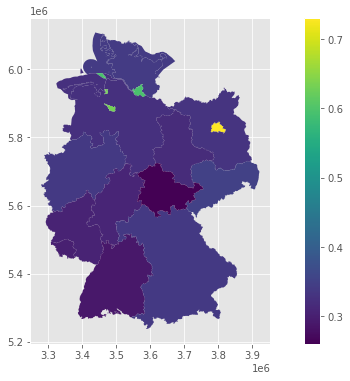

In [ ]:
map_df.plot('PKW_rel', legend=True)

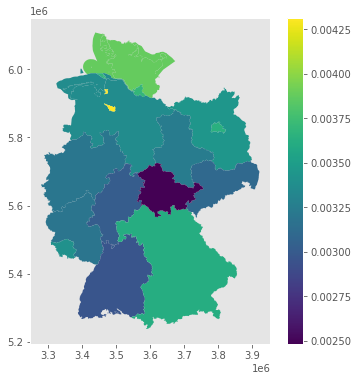

In [54]:
map_df['apc'] = map_df['accidents'] / map_df['Einwohner31122019']
map_df.plot('apc', legend=True).grid(axis='both')

plt.savefig('rate-acc-pop.png')

<class 'list'>
15


<BarContainer object of 15 artists>

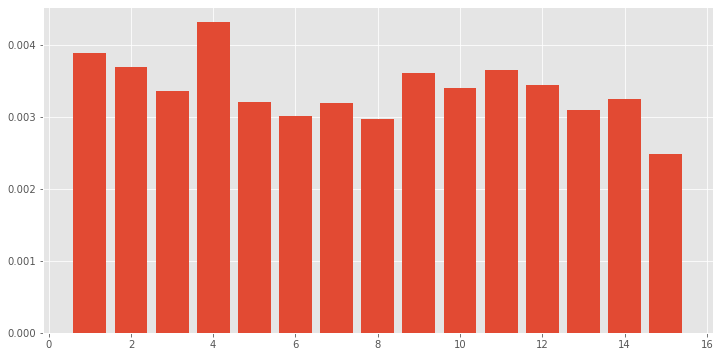

In [ ]:
# print(set(100*map_df['apc'])) # accidents per capita in %
acci['apc'] = acci['accidents'] / acci['Einwohner31122019']
h = list(acci['apc'])
print(type(h))
print(len(h))
xgrid = np.arange(1,len(h)+1)
plt.bar(xgrid,h)

the map and the bar plot seem to agree: Thüringen is lowest, Bremen is highest. Berlin is not good but not the worst either...

# something else

Why do I struggle with these shapefiles? Doesn't geopandas offer the map I need? Let's check :-)

<AxesSubplot:>

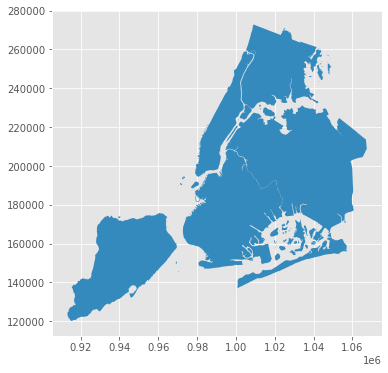

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))
nybb.plot()

<AxesSubplot:>

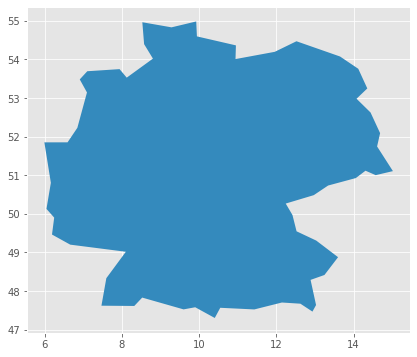

In [ ]:
# world['name']
# gpd.datasets.available # contains only 3 maps.
world[world['name']=='Germany'].plot() # well, thank you, not enough :-(